## Сервис аренды самокатов GoFast

В данном нам проекты мы выполним следущие шаги: загрузим данные, выполним предобработку, исследуем данные, посчитаем выручку и проверим гипотезы.

Основная цель проекта: проанализировать данные сервиса аренды самокатов GoFast и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.Сервисом можно пользоваться:
без подписки:

абонентская плата отсутствует;стоимость одной минуты поездки — 8 рублей; стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra:

абонентская плата — 199 рублей в месяц;стоимость одной минуты поездки — 6 рублей;стоимость старта — бесплатно.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

Импортируем необходимые бибилотеки

#### Шаг 1. Загрузка данных

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_subs = pd.read_csv('/datasets/subscriptions_go.csv')
display(data_users.head())
display(data_rides.head())
display(data_subs.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [3]:
data_users.info()
data_rides.info()
data_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Col

Получаем общую информацию о данных. Почти все данные имеют верный тип, однако, в датафрейме data_rides, в столбце date, данные имеют тип object, что в последствии мы исправим.

#### Шаг 2. Предобработка данных

In [4]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')
data_rides['month'] = data_rides['date'].dt.month
display(data_rides.head())

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Меняем тип данных в датафрейме data_rides, в столбце date с object на datetime. Создаем новый столбец с обозначением месяца.

In [5]:
data_rides.duplicated().sum()

0

In [6]:
data_users.duplicated().sum()

31

In [7]:
data_users = data_users.drop_duplicates()
data_users.duplicated().sum()

0

Удаляем выявленные дубликаты

In [8]:
data_subs.duplicated().sum()

0

Считаем количество дубликатов

In [9]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [10]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [11]:
data_subs.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

На этапе предобработки дубликаты были выявлены только в датафрейме data_users, и были устранены. Пропусков в данных обнаружено не было.

#### Шаг 3. Исследовательский анализ данных

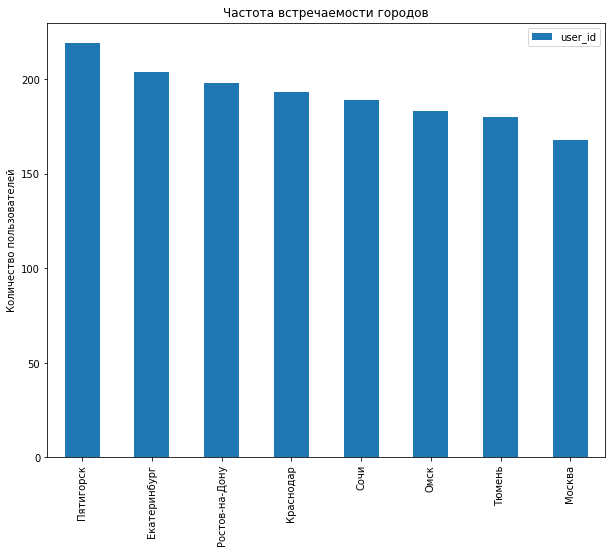

In [12]:
(data_users
    .pivot_table(index='city', values='user_id', aggfunc='count')
    .sort_values(by='user_id', ascending=False)
    .plot.bar(figsize=(10, 8), title='Частота встречаемости городов')
)
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.show()

In [13]:
display(data_users['city'].value_counts().sort_values(ascending=False))

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Больше всего клиентов сервиса аренды самокатов GoFast находится в Пятигорске, на втором месте Екатеринбург, на третьем - Ростов-на-Дону. Москва занимает наименьшую долю охвата.

<AxesSubplot:title={'center':'Соотношение пользователей с подпиской и без подписки'}>

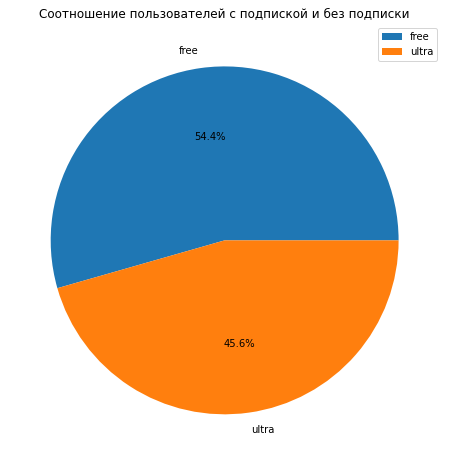

In [14]:
(data_users
    .pivot_table(index='subscription_type', values='user_id', aggfunc='count')
    .plot.pie(y='user_id', figsize=(8, 8), label='', autopct='%1.1f%%', title='Соотношение пользователей с подпиской и без подписки')
)

54,4 процента пользователей используют сервис без подписки.

Text(0, 0.5, 'Количество пользователей')

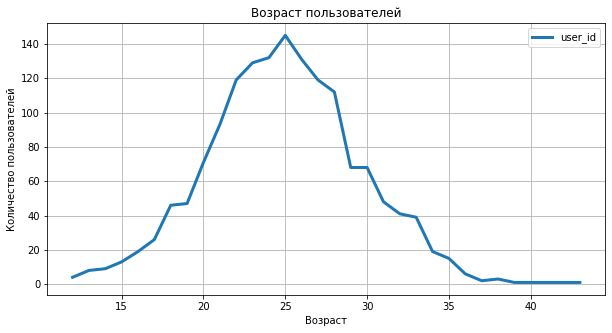

In [15]:
(data_users
    .pivot_table(index='age', values='user_id', aggfunc='count')
    .plot(grid=True, figsize=(10, 5), linewidth=3, title='Возраст пользователей')
)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

In [16]:
data_users.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


Основная масса пользователей сервиса в возрасте от 22 до 28 лет. А самому молодому зарегистрированному клиенту - 12 лет!

Text(0, 0.5, 'Количество пользователей')

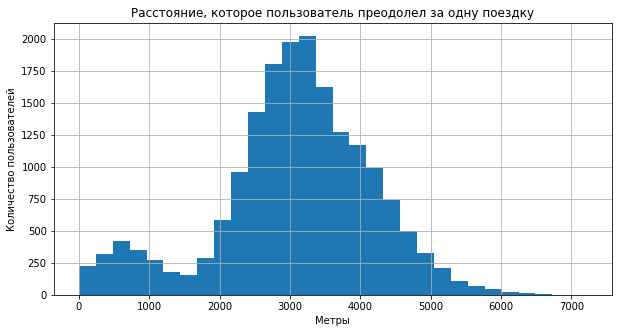

In [17]:
data_rides['distance'].hist(bins=30, figsize=(10, 5))
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Метры')
plt.ylabel('Количество пользователей')

Большинство пользователей сервиса совершают поездки длиной 3000 метров. Также стоит отметить, что присутствует доля небольших поездок - до 1000 метров, этот всплеск отчетливо прослеживается на графике.

Text(0, 0.5, 'Количество пользователей')

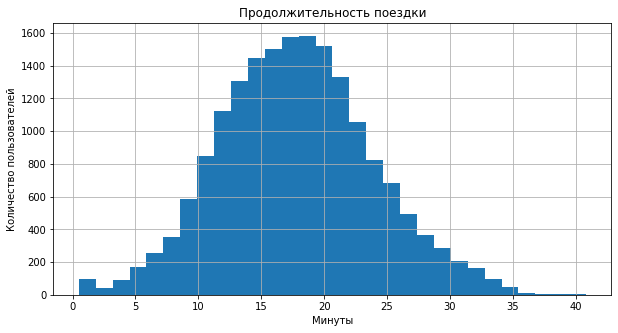

In [18]:
data_rides['duration'].hist(bins=30, figsize=(10, 5))
plt.title('Продолжительность поездки')
plt.xlabel('Минуты')
plt.ylabel('Количество пользователей')

Основное количество поездок длятся около 15-20 минут.

#### Шаг 4. Объединение данных

In [19]:
data_1 = data_users.merge(data_rides, on='user_id', how='inner')
display(data_1)

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


Объединяем данные о пользователях и их поездках.

In [20]:
data_full = data_1.merge(data_subs, on='subscription_type', how='inner')
display(data_full)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


Добавляем данные о подписках 

In [21]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [22]:
data_full.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

На этом этапе было объединено несколько датафреймов: data_users, data_rides, data_subs, в один - data_full. Объединение прошло корректно, данные не были потеряны.

In [23]:
data_subs_ultra = data_full.query('subscription_type == "ultra"')

In [24]:
display(data_subs_ultra.head())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Создаем отдельный датафрейм, с данными клиентов с подпиской. Изучаем превые 5 строк.

In [25]:
data_subs_free = data_full.query('subscription_type == "free"')

In [26]:
display(data_subs_free.head())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


А также без нее.

In [27]:
data_subs_ultra.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445388,18.541985,6.422308,6.0,0.0,199.0
std,201.099339,4.757208,836.895330,5.572048,3.414616,0.0,0.0,0.0
min,1.000000,12.000000,244.210438,3.760353,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.444017,14.524654,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.637229,18.178153,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.574425,21.884129,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.769662,40.823963,12.000000,6.0,0.0,199.0


Text(0, 0.5, 'Количество пользователей')

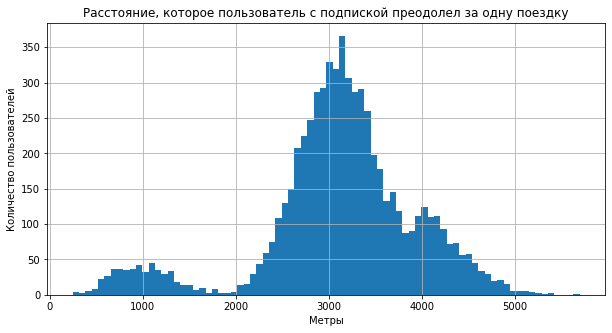

In [28]:
data_subs_ultra['distance'].hist(bins=80, figsize=(10, 5))
plt.title('Расстояние, которое пользователь с подпиской преодолел за одну поездку')
plt.xlabel('Метры')
plt.ylabel('Количество пользователей')

С подпиской расстояние, преодолеваемое пользователем – 3000 метров.

In [29]:
data_subs_free.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495282,17.390909,6.522994,8.0,50.0,0.0
std,241.165628,4.481100,1246.173806,6.326803,3.449770,0.0,0.0,0.0
min,700.000000,12.000000,0.855683,0.500000,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.562689,12.958437,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.648465,17.326890,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.697894,21.594071,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.007745,34.948498,12.000000,8.0,50.0,0.0


Text(0, 0.5, 'Количество пользователей')

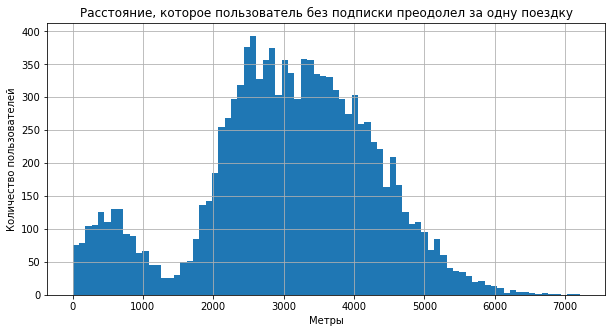

In [30]:
data_subs_free['distance'].hist(bins=80, figsize=(10, 5))
plt.title('Расстояние, которое пользователь без подписки преодолел за одну поездку')
plt.xlabel('Метры')
plt.ylabel('Количество пользователей')

Расстояние, преодолевамое пользователями без подписки имеет больший размах – от 2400 до 3900 метров

Text(0, 0.5, 'Количество пользователей')

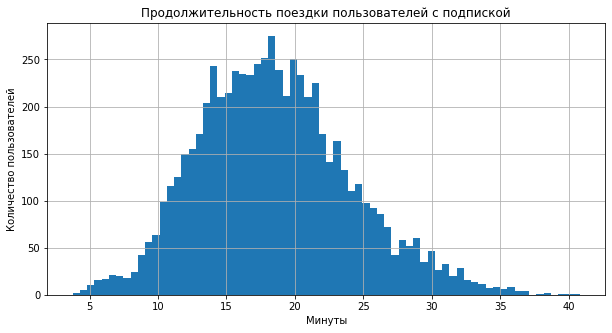

In [31]:
data_subs_ultra['duration'].hist(bins=70, figsize=(10, 5))
plt.title('Продолжительность поездки пользователей с подпиской')
plt.xlabel('Минуты')
plt.ylabel('Количество пользователей')

Продолжительность поездки у пользователей с подпиской от 13 до 22 минут.

Text(0, 0.5, 'Количество пользователей')

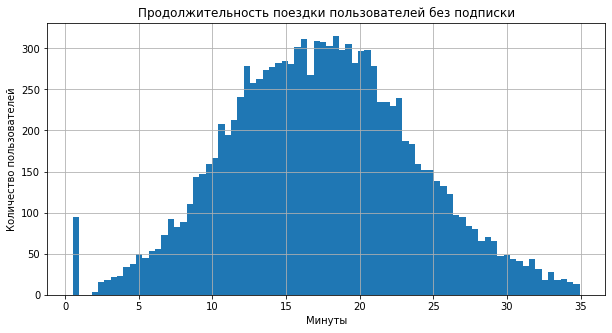

In [32]:
data_subs_free['duration'].hist(bins=80, figsize=(10, 5))
plt.title('Продолжительность поездки пользователей без подписки')
plt.xlabel('Минуты')
plt.ylabel('Количество пользователей')

Основаня масса пользователей без полпиской совершает поездки длительностью от 15 до 22 минут.

Хотелось бы немного обобщить полученную информацию:
* У пользователей без подписки чаще бывают поездки длиной до 1000 метров.
* Средняя продолжительность поездки у пользователей с подпиской и без примерно одинакова, но, у пользователей без нее встречается бум коротких поездок на графике продоложительности поездки.

#### Шаг 5. Подсчёт выручки

In [33]:
data_full['duration'] = np.ceil(data_full['duration'])

Округляем продолжительность поездки

In [34]:
data_unload = data_full.pivot_table(index=['user_id', 'month'], values=['distance', 'name', 'duration', 'subscription_type'], aggfunc={'distance': 'sum', 'name': 'count', 'duration': 'sum', 'subscription_type': 'min'})
data_unload.columns = ['total_distance', 'total_duration', 'quantity', 'subscription_type']
display(data_unload.head())

total_distance  total_duration  quantity subscription_type
user_id month                                                            
1       1         7027.511294            42.0         2             ultra
        4          754.159807             7.0         1             ultra
        8         6723.470560            46.0         2             ultra
        10        5809.911100            32.0         2             ultra
        11        7003.499363            56.0         3             ultra

Создаем сводную таблицу и переименовываем столбцы

Далее посчитаем помесячную выручку: Помесячная выручка считается по формуле: стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [35]:
data_unload.loc[data_unload['subscription_type'] == 'ultra', "income"] = (6 * data_unload['total_duration']) + 199

Считаем, какую выручку принес каждый пользователь с подпиской

In [36]:
data_unload.loc[data_unload['subscription_type'] == 'free', "income"] = (50 * data_unload['quantity']) + (8 * data_unload['total_duration'])

А также, какую выручку принес каждый пользователь без подписки

In [37]:
display(data_unload.head())

total_distance  total_duration  quantity subscription_type  \
user_id month                                                               
1       1         7027.511294            42.0         2             ultra   
        4          754.159807             7.0         1             ultra   
        8         6723.470560            46.0         2             ultra   
        10        5809.911100            32.0         2             ultra   
        11        7003.499363            56.0         3             ultra   

               income  
user_id month          
1       1       451.0  
        4       241.0  
        8       475.0  
        10      391.0  
        11      535.0

Выгрузка корректно посчитана по заданной формуле.

#### Шаг 6. Проверка гипотез

Нулевая гипотеза - потраченное время пользователей с подпиской равно потраченному времени пользователей без подписки.
Альтернативная гипотеза - потраченное время пользователей с подпиской больше чем, у пользователей без подписки

In [38]:
alpha = 0.05
 
results = st.ttest_ind(data_subs_ultra['duration'], data_subs_free['duration'], alternative = 'greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу.


In [39]:
print('Среднее время поездки пользователей без подписки, мин:', data_full['duration'].loc[data_full['subscription_type'] == 'free'].mean().round(2))

Среднее время поездки пользователей без подписки, мин: 17.89


In [40]:
print('Среднее время поездки пользователей с подпиской, мин:', data_full['duration'].loc[data_full['subscription_type'] == 'ultra'].mean().round(2))

Среднее время поездки пользователей с подпиской, мин: 19.04


Нулевая гипотеза - потраченное время пользователей с подпиской равно потраченному времени пользователей без подписки - отвергнута, есть основания утверждать, что среднее время поездки пользователей с подпиской больше, чем у пользователелей без подписки.

Нулевая гипотеза - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равняется
3130 метрам.
Альтернативная гипотеза - среднее расстояние, которое преодолевают пользователи с подпиской за одну поездку более 3130 метров.

In [41]:
optimal = 3130
alpha = 0.05

results = st.ttest_1samp(
    data_subs_ultra['distance'], 
    optimal,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


In [42]:
print('Средняя продолжительность поездки пользователей с подпиской, м:', data_subs_ultra['distance'].mean().round(0))

Средняя продолжительность поездки пользователей с подпиской, м: 3115.0


Самокаты в сервисе GoFast изнашиваются пользователями с подпиской, не превышая оптимального значения в 3130 метров.

Нулевая гипотеза - средняя выручка от поездок с подпиской и без неё равна.
Альтернативная гипотеза - Средняя выручка от пользователей с использованием подписки выше, чем выручка от пользователей без подписки.

In [43]:
alpha = 0.05

results = st.ttest_ind(
    data_unload['income'].loc[data_unload['subscription_type'] == 'ultra'],
    data_unload['income'].loc[data_unload['subscription_type'] == 'free'],
    equal_var=False,
    alternative='greater'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу


In [44]:
display(data_unload['income'].loc[data_unload['subscription_type'] == 'ultra'].mean().round(2))

362.79

In [45]:
display(data_unload['income'].loc[data_unload['subscription_type'] == 'free'].mean().round(2))

328.64

Вывод: средняя выручка от пользователей с подпиской выше, чем от пользователей без подписки на 34,15 руб - нулевая гипотеза была отвергнута.

6.4 Если списки уникальных пользователей в них совпадают, то выборки зависимы и для проверки гипотезы потребуется тест st.ttest_rel(before, after, alternative='less')В ином случае, выборки не могут быть зависимы и для проверки гипотезы потребуется тест: st.ttest_ind(before, after, equal_var=False, alternative='less'). Где, equal_var=False, т.к. выборки не равны, а alternative='less', т.к. основная гипотеза отвергается, если изначально обращений было меньше, чем после обновлений сервиса.

Общий вывод.
По результатам проделанной работы можно сделать вывод, что исходные данные были без пропусков, с минимальным количеством дубликатов, что доказывает высокую точность исследования.

Исследования показали, что клиенты сервиса аренды самокатов GoFast пропорциально распределны в охватываемых сервисом городах. Основная масса пользователей сервиса от 20 до 30 лет. Большинство клиентов используют сервис без подписки. Средний возраст пользователей с подпиской и без примерно одинаковый - около 25 лет. Расстояние, которые преодолевают пользователи с подпиской и без составляет около 3000 метров, а продолжительность поездки - от 15 до 22 минут.

На основании гипотез были сделаны следующие выводы:
1. Среднее время поездки пользователей с подпиской больше, чем у пользователелей без подписки
2. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров
3. Средняя выручка от пользователей с подпиской выше, чем от пользователей без подписки на 34,15 руб.

В итоге, пользователи с подпиской приносят сервису больше выручки, так как длительность их поездки больше, а также средняя выручка от таких клиентов выше.